# Distribution of movie ratings, H5
Movies are rated by different categories such as G, PG, PG-13, R and so on. 
Some of the classifaction of ratings are: 
* G: General Audiences. This program is designed to be appropriate for all ages.
* PG: Parental Guidance Suggested. Parents are urged to give parental guidance.
* PG-13: Parents Strongly Cautioned. Some material may not be suited for children under age 13.
* R: Restricted.
* NC-17: Clearly Adult.

### Objective
* **Goal:** Count occurannces of each rating, filter out the rare ones and create a pieplot to show the proportions of movies categorized with G, PG, PG-13 and R.
* **Hypothesis 5:** Most movies in the dataset fall under the **PG-13** category, as blockbuster movies tend to aim for this rating to maximizee audience reach

*Description of set up is written in H1 Popular review* 

First i set up the data, making it easy and understandable to create the visualization



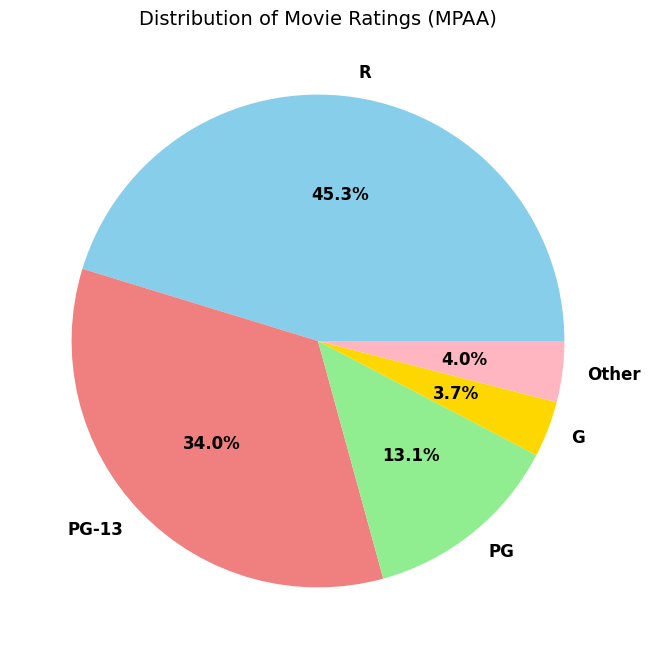

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/merged_dataset.csv")

# Count occurrences of each MPAA rating
rating_counts = df['movie_rated'].value_counts()

# Define a threshold: If a rating appears less than X times, group it as "Other"
threshold = 50  # Adjust based on your dataset
rating_counts_filtered = rating_counts.copy()
rating_counts_filtered[rating_counts < threshold] = 0  # Set small categories to 0

# Add an "Other" category
rating_counts_filtered["Other"] = rating_counts[rating_counts < threshold].sum()

# Remove categories that were merged into "Other"
rating_counts_filtered = rating_counts_filtered[rating_counts_filtered > 0]

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts_filtered, labels=[f"{label}" for label in rating_counts_filtered.index], 
        autopct='%1.1f%%', textprops={'fontsize': 12, 'fontweight': 'bold'},
        colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink', 'gray'])
plt.title("Distribution of Movie Ratings (MPAA)", fontsize=14)

#plt.savefig('../plots/Distribution_movie_ratings.png') choose not to save because of the exam cleanup
plt.show()

### Conclusion
My hypothesis was incorrect. R is the most common rating category, but PG-13 is second most used. Thereafter PG and G is quite common. The 4.0% Other section includes filtered rating outcomes used less than 50 times (treshold). This was used to minimize many small labels and colors (including everything). 